# Lab Genetic 

## Grupo #3

### Algoritmos 

### 2022-2

####1) En primer lugar, vamos a importar las librerias necesarias para la implementación del algoritmo mencionado en el enunciado

In [114]:
import matplotlib.pyplot as plt
import numpy as np
import math

####2) A continuación vamos a implementar nuestra propia versión del algoritmo bajo el enfoque decimal

2.1) Vamos a declarar los parámetros respectivos al tamaño del genoma de los individuos, el tamaño de la población, probabilidad de mutación, función a optimizar y el rango de búsqueda.

In [220]:
generations = int(input("Ingrese el número de generaciones: "))
genome_size = int(input("Ingrese el tamaño del genoma de los individuos: "))
population_size = int(input("Ingrese el tamaño de la población: "))
mutation_probability = float(input("Ingrese la probabilidad de mutación los individuos (en términos de porcentaje): "))
optimized_function = input("Ingrese la función a optimizar usando x como variable independiente: ")
search_range_lower_limit = int(input("Ingrese el límite inferior del rango de búsqueda: "))
search_range_upper_limit = int(input("Ingrese el límite superior del rango de búsqueda: "))

mutation_probability = mutation_probability/100

Ingrese el número de generaciones: 100
Ingrese el tamaño del genoma de los individuos: 15
Ingrese el tamaño de la población: 100
Ingrese la probabilidad de mutación los individuos (en términos de porcentaje): 0.5
Ingrese la función a optimizar usando x como variable independiente: -(0.1+(1-x)**2-0.1*math.cos(6*math.pi*(1-x)))+2
Ingrese el límite inferior del rango de búsqueda: 0
Ingrese el límite superior del rango de búsqueda: 2


2.2) Probamos la función respectiva para nuestro algoritmo

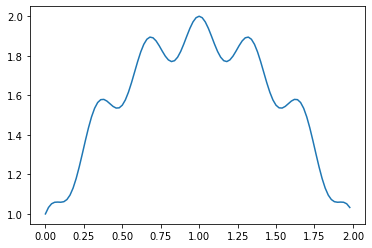

In [221]:
def function(x,f):
  x=x
  return eval(f)

y_axis = []
x_axis=np.arange(search_range_lower_limit,search_range_upper_limit,0.02)

for num in x_axis:
    y_axis.append(function(num,optimized_function))

# Graficamos la función respectiva
plt.plot(x_axis,y_axis)

2.3) Definimos la función de conversión a lista a decimal

In [222]:
def listToDecimal(num):
    decimal=0
    for i in range(len(num)):
        decimal+=num[i]*10**(-i)
    return decimal

2.4) Definimos la función de mutación de los individuos

In [234]:
def mutate(individuals, prob, pool):
    for i in range(len(individuals)):
        mutate_individual=individuals[i]
        if np.random.random() < prob:
            mutation = np.random.choice(pool[0])
            mutate_individual = [mutation] + mutate_individual[1:]
        
        for j in range(1,len(mutate_individual)):
            if np.random.random() < prob:
                mutation = np.random.choice(pool[1])
                mutate_individual = mutate_individual[0:j] + [mutation] + mutate_individual[j+1:]
        individuals[i] = mutate_individual

2.5) Definimos el conjunto genético mediante un arreglo de arreglos donde el primer arreglo de la lista corresponde a los números entre el límite inferior de la búsqueda y el límite superior contiene todos los dígitos para valores decimales posibles

In [243]:


lista = [num for num in range(search_range_lower_limit,search_range_upper_limit)]



ind_size = genome_size
genetic_pool=[lista,[0,1,2,3,4,5,6,7,8,9]]
individuo = []
individuo += [np.random.choice(genetic_pool[0])]
individuo += list(np.random.choice(genetic_pool[1],ind_size-1))

individuo


[1, 7, 8, 5, 3, 7, 7, 9, 0, 0, 9, 9, 8, 9, 6]

2.6) Definimos la población de la primera generación bajo el uso del parámetro del tamaño de la misma y las funciones de extracción de valores aleatorios de nuestro arreglo genetic_pool y la concatenación de listas mediante la librería numpy

In [244]:
poblacion = []

for i in range(population_size):
    individuo = []
    individuo += [np.random.choice(genetic_pool[0])]
    individuo += list(np.random.choice(genetic_pool[1],ind_size-1))
    poblacion.append(individuo)

print(poblacion[:population_size])


# Declaramos una lista para recolectar el promedio del genoma de cada generacion
mean_array =[]
max_array = []



[[0, 2, 3, 0, 8, 4, 2, 5, 4, 7, 5, 5, 0, 2, 0], [0, 6, 8, 0, 1, 5, 6, 3, 5, 2, 8, 4, 9, 4, 3], [0, 7, 8, 1, 8, 4, 7, 4, 9, 1, 0, 5, 5, 1, 7], [1, 7, 5, 9, 7, 6, 5, 1, 1, 5, 7, 8, 6, 6, 7], [1, 0, 9, 3, 1, 4, 7, 5, 5, 7, 7, 3, 6, 6, 0], [0, 5, 6, 3, 2, 9, 2, 9, 9, 9, 2, 8, 3, 3, 4], [0, 0, 0, 3, 3, 9, 6, 4, 1, 8, 9, 1, 9, 0, 5], [1, 4, 0, 3, 7, 5, 6, 7, 8, 4, 7, 5, 8, 8, 6], [0, 1, 6, 5, 6, 6, 4, 9, 1, 3, 1, 8, 3, 7, 7], [0, 6, 2, 0, 6, 6, 1, 7, 8, 0, 4, 8, 6, 1, 1], [0, 3, 5, 2, 8, 1, 4, 0, 3, 8, 2, 1, 5, 2, 0], [1, 9, 1, 5, 3, 0, 5, 8, 8, 8, 9, 3, 0, 4, 7], [1, 3, 6, 7, 7, 9, 4, 7, 4, 7, 8, 1, 2, 8, 2], [0, 7, 7, 9, 8, 0, 1, 2, 3, 4, 5, 5, 6, 0, 9], [1, 5, 6, 2, 9, 9, 7, 4, 0, 2, 3, 5, 4, 2, 4], [1, 1, 7, 1, 4, 4, 5, 0, 6, 6, 2, 7, 6, 9, 6], [0, 3, 3, 4, 9, 0, 2, 8, 7, 9, 9, 6, 6, 5, 8], [0, 4, 8, 4, 2, 0, 2, 6, 7, 3, 4, 8, 2, 7, 0], [1, 6, 0, 6, 4, 5, 9, 2, 1, 1, 6, 2, 7, 2, 6], [0, 2, 2, 2, 0, 1, 8, 6, 1, 7, 2, 6, 2, 8, 2], [1, 1, 5, 3, 8, 0, 1, 1, 1, 3, 4, 1, 3, 7, 7], [0, 1, 0, 2,

2.7) Observamos a los individuos respecto a la gráfica de la función

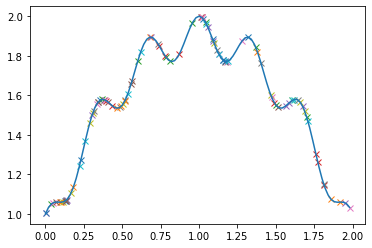

In [245]:
#array para almacenar el genoma en valor decimal

fitness =[]

for individuo in poblacion:
    x = listToDecimal(individuo)
    y = function(x,optimized_function)
    plt.plot(x,y,'x')
plt.plot(x_axis,y_axis)


2.8) Implementamos el algoritmo genético de selección natural para 1000 generaciones y recolectamos el promedio del genoma de cada generación

In [246]:



best_guy = 0 # mejor individuo de todas las generaciones

for generacion in range(generations):
    
    fitness =[]

    people_decimal = []
    #extraigo los valores de y para medir su éxito
    for individuo in poblacion:
        x = listToDecimal(individuo)
        y = function(x,optimized_function)
        people_decimal.append(y)
        fitness += [y]

    


    fitness = np.array(fitness)
     # almacenamos el promedio del genoma de cada generacion
    mean_array.append(fitness.mean())

    max_array.append(fitness.max())
    
    if fitness.max()>best_guy:
      best_guy = fitness.max()

    fitness=fitness/fitness.sum()



    offspring = []
    for i in range(population_size//2):
        parents = np.random.choice(population_size, 2, p=fitness)
        cross_point = np.random.randint(ind_size)
        offspring += [poblacion[parents[0]][:cross_point] + poblacion[parents[1]][cross_point:]]
        offspring += [poblacion[parents[1]][:cross_point] + poblacion[parents[0]][cross_point:]]    
    
    poblacion = offspring
    
    # MUTACIONES
     
    mutate(poblacion,0.005,genetic_pool)



2.9) Para calcular el error porcentual de cada generación, tomamos el individuo con el mejor genoma y lo consideramos como el valor esperado de todas las generaciones, y aplicamos la formula de error porcentual para el promedio de cada generación como valor exacto.

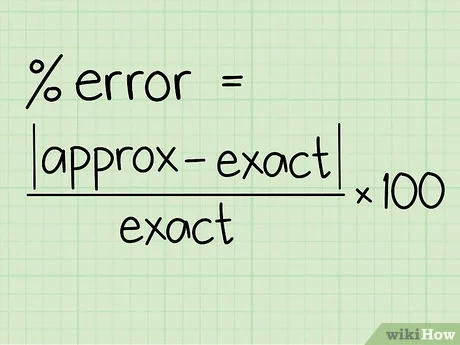

2.10) Identificamos el mejor individuo de todas las generaciones

In [247]:
print("Genoma del mejor individuo: ",best_guy)

Genoma del mejor individuo:  1.9999988012850738


2.11) Guardamos el porcentaje de error de cada generación con la fórmula descrita en el apartado 2.9

In [248]:
porcentual_error = []

for i in mean_array:
  
  error = ((best_guy-i)/i)*100
  porcentual_error.append(error)

porcentual_error

[29.305233852022194,
 25.760115220910336,
 18.09717903770497,
 17.35049033432595,
 16.751433930044996,
 15.667313040115632,
 14.885865967360015,
 14.647656039292409,
 16.51746564751731,
 12.827152886272009,
 12.673161855985486,
 10.68800959481895,
 8.173193723375778,
 8.156233856216097,
 7.005441499618486,
 7.432562274824367,
 8.568084078415668,
 7.230235456288672,
 6.495888402605811,
 8.254249643274155,
 8.38519329633729,
 7.957578856323197,
 7.48373508932811,
 7.632465179217618,
 6.208641320553795,
 5.736842126377216,
 5.832695146339015,
 6.214987971098768,
 7.937223973780931,
 8.819336157603619,
 9.087877587529105,
 7.565615165331131,
 6.187076336036192,
 6.593627799540948,
 7.281515210808983,
 7.135622845132746,
 7.96170576973078,
 8.656436449420815,
 4.741295387630724,
 5.189619112430902,
 4.36746661023975,
 4.097293371697601,
 4.335955517736008,
 4.944923864930323,
 6.005846437714496,
 6.620388428367045,
 5.582062579747222,
 4.221522770861014,
 6.086990985095781,
 5.0226937908385

2.12) Graficamos el error porcentual por cada generación

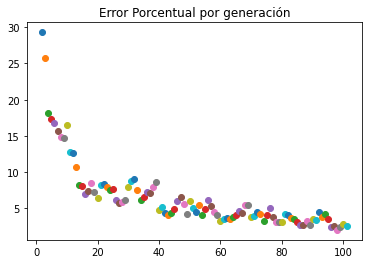

In [249]:
cont=1

for i in porcentual_error:
  cont+=1
  plt.plot(cont,i,'o')
  plt.title('Error Porcentual por generación')

2.13) Graficamos el genoma del mejor individuo por cada generación

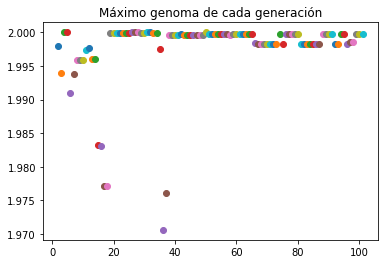

In [250]:
cont=1

for i in max_array:
  cont+=1
  plt.plot(cont,i,'o')
  plt.title('Máximo genoma de cada generación')

#### 3) Análisis de complejidad específica del algoritmo, es decir, en función de los parámetros dimensionales de la configuración

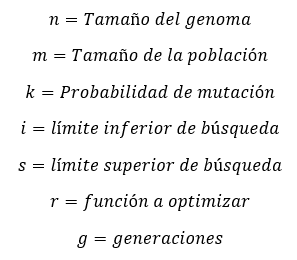


3.1) Complejidad de la funcion function y la graficación de la función
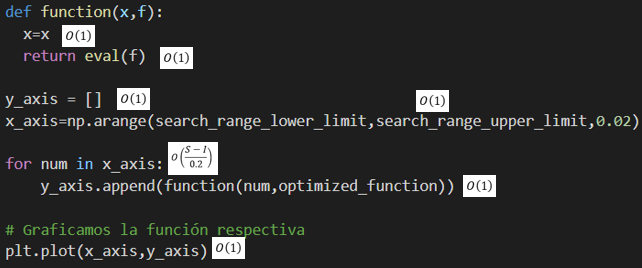


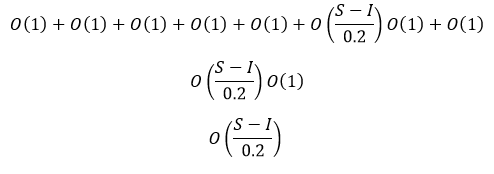

3.2) Complejidad de la función listToDecimal

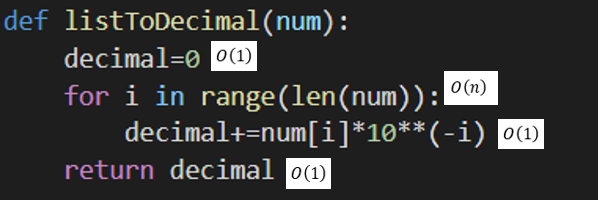

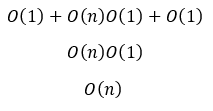

3.3) Complejidad de la función Mutate

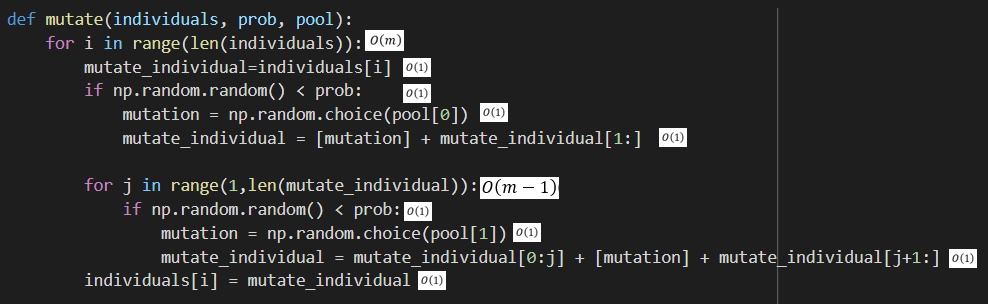

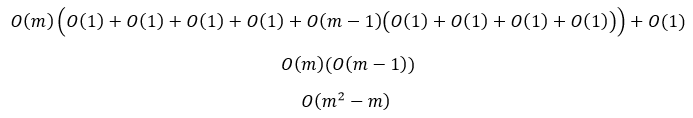


3.4) Complejidad de la generación del conjunto de genomas

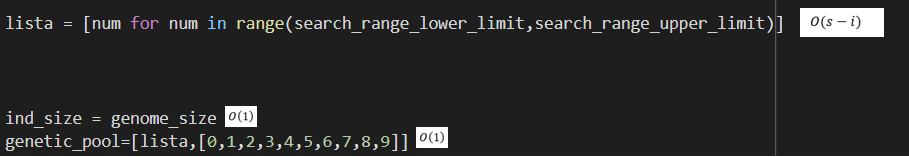

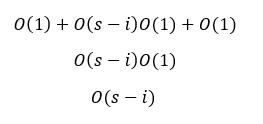

3.5) Complejidad de la creación de la primera generación de individuos

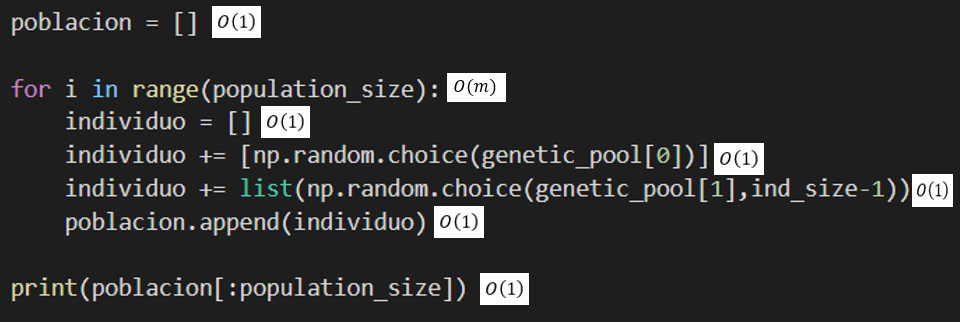

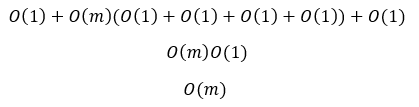

3.6) Complejidad del algoritmo de paso de generaciones

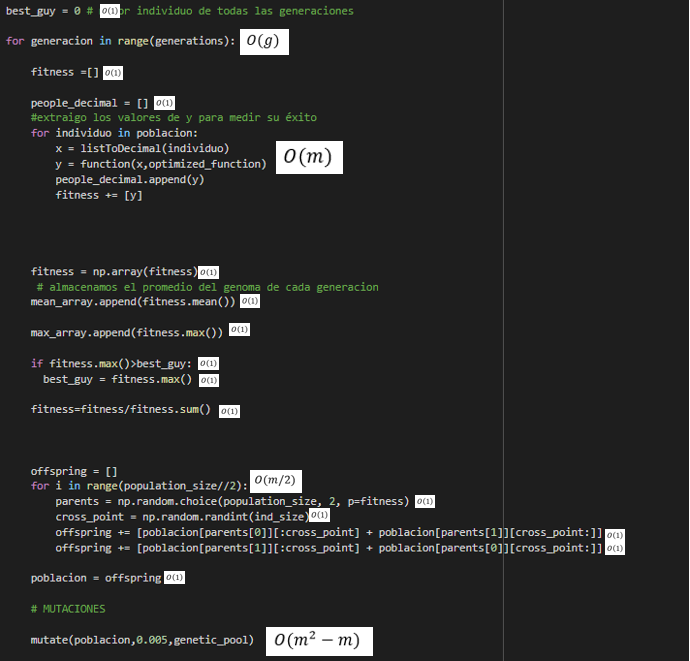

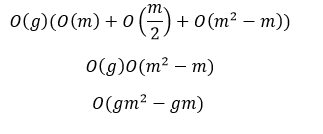

3.7) Cálculo total del algoritmo (sin contar los procedimientos de gráficación de estadísticas, solo el algoritmo de toda la selección natural y optimización de la función)

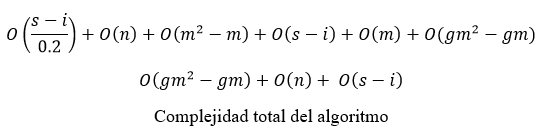

#### 4) ¿Como reacciona el algoritmo a variadas funciones de optimización?

Según el algoritmo desarrollado, es posible inferir que en una función lineal, los individuos hijos de generaciones posteriores buscarán converger a uno de los dos extremos de los límites brindados como parámetro, en este caso el que tenga la mayor imagen de x.

Por otro lado, para el caso de funciones de mayor oscilación, se presentará un porcentaje de error mayor debido a los diferentes cambios de pendiente a lo largo de los valores de y, así mismo, el individuo de mayor genoma por cada generación será más cambiante que en una función de menor oscilación.

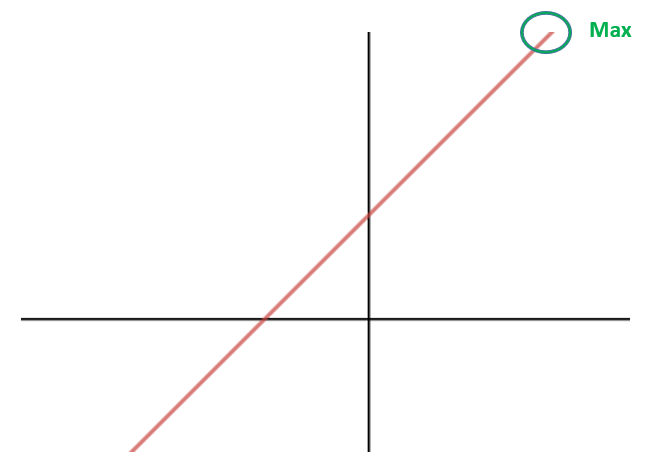

#### 5) Concluya y describa, como están relacionados los parámetros de configuración del algoritmo con el costo en tiempy y espacio.

Tal y como calculamos anteriormente, la complejidad total tiene su foco más importante en el número de generaciones y el número de individuos en la población, ya que van a representar la cantidad de iteraciones referentes a las operaciones de entrecruzamiento y las mutaciones a evaluar en cada generación.

Así mismo, los límites también juegan un papel bastante importante a la hora de realizar graficación y la creación del conjunto de genomas, aunque es un parámetro que no va ligado con las generaciones por lo que no compromete en gran medida el costo de procesamiento.

Por último, cabe destacar que los parámetros que menos influyen en el algoritmo en términos de costo computacional son la probabilidad de mutación y la función a optimizar, ya que en cualquiera de los casos, estos parámetros solo tienen incidencia en operaciones de tipo O(1).

6) ¿Qué parámetros considera usted más importante para acelerar la convergencia de búsqueda?

Sin contar la función a optimizar, ya que la idea de esta interrogante es acelerar la forma en que encontramos el máximo absoluto de la misma, los parámetros más influyentes son las probabilidades de mutación y el número de generaciones.

Para el caso de la mutación, si tenemos un grado de probabilidad de mutación bastante alto tendremos inconvenientes al encontrar el individuo perfecto (máximo de la función) al estar la mayoría de los mismos en constante cambio de su genoma por efecto de la mutación.

Por otro lado, podemos notar que entre más iteraciones hagamos en términos de generaciones, es decir, evaluemos la población en un número mayor de generaciones; encontraremos que la convergencia será mucho más precisa al llegar al final del algoritmo. No obstante, este proceso sacrificaría más costo computacional y mayor tiempo de ejecución tal y como se demostró anteriormente.